In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from sheetly import Sheetly

E4


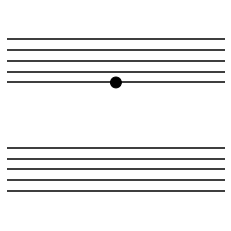

In [8]:
s = Sheetly()
fig, ax = s.draw_staff(axis=False)
# y,note = (18,'C4')
# y,note = (30,'C4')
# y,note = (10,'C4')
# y,note = (-2,'C4')
y,note = s.get_rand_note()
print(note)
s.draw_notes([y],ax)

In [9]:
'123'[0]

'1'